<a href="https://colab.research.google.com/github/Rohan5076/Capstone_Project_1_Propensity_Model/blob/main/Capston_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title- Customer Analysis: Predicting Potential Customers Who Can Buy Our Service.** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Problem Description**

We have large number of customers. Our sales team would like to call potential customers who  can by our service. We don't  have to enough manpower & time to call & reach every customer & convinence them for our products. Also we need to rank customer so that we could offer them our product & services with discounted price.

## **You are given the following information:**

-InvoiceNo

-StockCode

-Description

-Quantity

-InvoiceDate

-UnitPrice

-CustomerID

-Country


## **Work Flow:**

-Customer Segmentation.

-Potential Vs Non-potential.

-Who Can Buy Our Services In Current Month? (Predicted Sales For 30, 60, 90 days)

-Customer Lifetime Values(CLTV). Live Vs Dead Customers

-Lifetime Package. (Recency, Frequency, Monetory, Analysis)

-Cohort Analysis.



# **1. Invite Some Libraries:**

In [3]:
#import pandas and numpy module:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt
from operator import attrgetter

In [47]:
#Making DataFrame:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/Copy of Online Retail.xlsx')

# **Review Our Dataset**

In [48]:
#Top 5 entries of data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
#There are null values in CustomerID column
#checking info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [50]:
#there are 541909 rows and 8 columns in our dataset
df.shape

(541909, 8)

In [51]:
# Names Of columns in our dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [52]:
# There are 4372 unique locations from where the CustomerID.
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [53]:
#there are some values in Quantity are in negative
df.Quantity.value_counts()

 1.0        148227
 2.0         81829
 12.0        61063
 6.0         40868
 4.0         38484
             ...  
-472.0           1
-161.0           1
-1206.0          1
-272.0           1
-80995.0         1
Name: Quantity, Length: 722, dtype: int64

In [54]:
#Dealing with negative values in Quantity
df['Quantity'] = df['Quantity'].abs()

df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270954,560601.0,22138.0,BAKING SET 9 PIECE RETROSPOT,1.0,2011-07-19 17:17:00,4.95,16764.0,United Kingdom
148468,549240.0,48138.0,DOORMAT UNION FLAG,1.0,2011-04-07 11:37:00,7.95,15910.0,United Kingdom
148469,549240.0,23154.0,SET OF 4 JAM JAR MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148470,549240.0,23156.0,SET OF 5 MINI GROCERY MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148472,549240.0,21199.0,PINK HEART CONFETTI IN TUBE,1.0,2011-04-07 11:37:00,1.65,15910.0,United Kingdom
...,...,...,...,...,...,...,...,...
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [55]:
#There is null values in CustomerID
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414.0,22139.0,NaN,56.0,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544.0,21773.0,DECORATIVE ROSE BATHROOM BOTTLE,1.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544.0,21774.0,DECORATIVE CATS BATHROOM BOTTLE,2.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544.0,21786.0,POLKADOT RAIN HAT,4.0,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544.0,21787.0,RAIN PONCHO RETROSPOT,2.0,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498.0,85099B,JUMBO BAG RED RETROSPOT,5.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498.0,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498.0,85150.0,LADIES & GENTLEMEN METAL SIGN,1.0,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498.0,85174.0,S/4 CACTI CANDLES,1.0,2011-12-09 10:26:00,10.79,NaN,United Kingdom


# **Heat map for missing values**

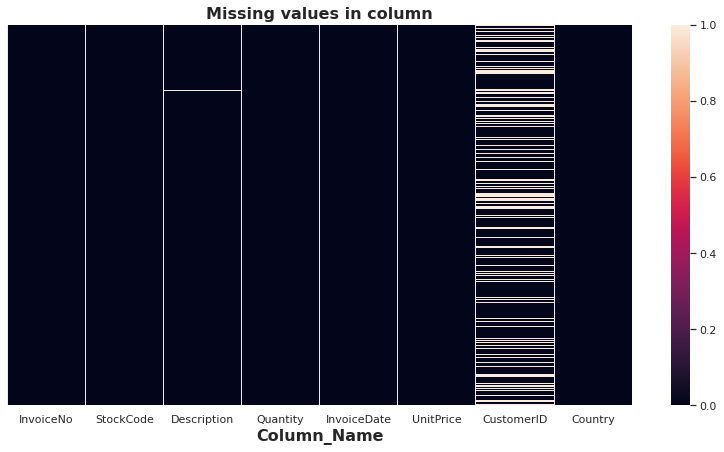

In [56]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=16, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=16)
plt.show()

we can see the only null values in CustomerID are noticiable. but we have to drop that.

In [57]:
#checking the % of null values in our dataset
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

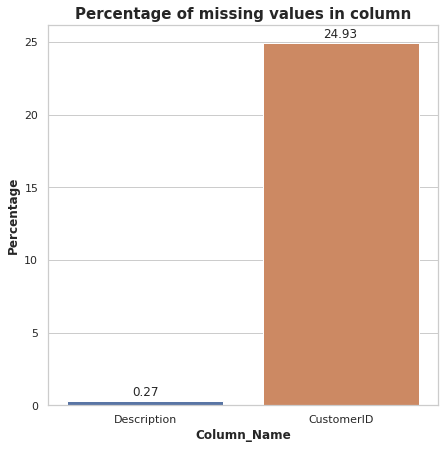

In [58]:
plt.figure(figsize=(7, 7))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=12, weight="bold")
plt.ylabel("Percentage", size=12, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=15)
plt.show()

There is 24.93% of missing values in CustomerID column, so we are drop this.

In [59]:
#we will Drop null values
df1=df.dropna(subset=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [60]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [61]:
df1[df1['Quantity'] <=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Count, Unique Values and Frequency of Veriables.**

In [62]:
# restrict to transactions with positive quantities
df1 = df1[df1["Quantity"] > 0]

# datetime to date format
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"]).dt.date #normalize()
#df1.set_index("InvoiceDate", inplace=False)

# treat CustomerID as a categorical variable
df1["CustomerID"] = df1["CustomerID"].astype(np.int64).astype(object)

# review the categorical variables
df1.describe(include='object').T

,count,unique,top,freq
InvoiceNo,406829.0,22190.0,576339.0,542.0
StockCode,406829,3684,85123A,2077
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,406829,305,2011-11-06,3434
CustomerID,406829,4372,17841,7983
Country,406829,37,United Kingdom,361878


# **Unique values in each column:**

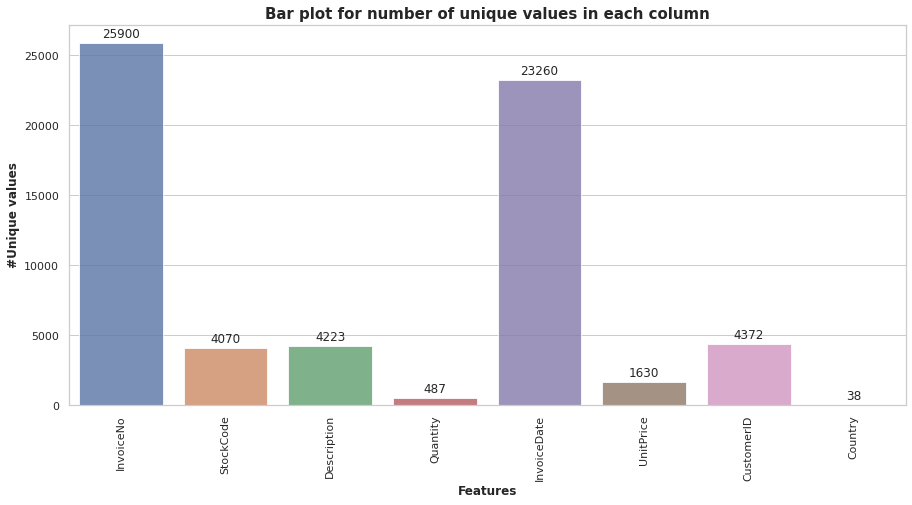

In [63]:
#Represent the bar plot of unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()



# **'0.00' Unitprice replaced with '0.1'**

In [64]:
df1['UnitPrice']
df1.replace(to_replace = 0.00, value =0.1, inplace=True)

# **Add new column of Revenues:**  

Total Purchase Amount

In [65]:
#It is defined as total purchase amount:
# revenues = quantity * unitprice
df1["Revenues"] = df1["Quantity"] * df1["UnitPrice"]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09,0.85,12680,France,10.20
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09,2.10,12680,France,12.60
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09,4.15,12680,France,16.60
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09,4.15,12680,France,16.60


In [66]:
#data types
df1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Revenues       float64
dtype: object

# **Arrenge the 'Quantity' in Desending order.**

In [67]:
#Checking range of Quantity

df1.sort_values("Quantity" , axis = 0, ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25,0.10,13256,United Kingdom,1254.00
...,...,...,...,...,...,...,...,...,...
233061,557426.0,21625.0,VINTAGE UNION JACK APRON,1.0,2011-06-20,6.95,15016,United Kingdom,6.95
233060,557426.0,21364.0,PEACE SMALL WOOD LETTERS,1.0,2011-06-20,6.75,15016,United Kingdom,6.75
456017,575661.0,22573.0,STAR WOODEN CHRISTMAS DECORATION,1.0,2011-11-10,0.85,12617,France,0.85
456016,575661.0,23333.0,IVORY WICKER HEART MEDIUM,1.0,2011-11-10,1.25,12617,France,1.25


In [68]:
df1.describe()

,Quantity,UnitPrice,Revenues
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460481,23.410667
std,248.624170,69.315161,427.442070
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.680000
50%,5.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


# **Total count of repeted customers in referance of CustomerID and getting top 10 entries.**

In [69]:
repeted_customer= df1.CustomerID.value_counts()

In [70]:
repeted_customer.value_counts()

1       79
6       78
10      74
7       72
12      72
        ..
389      1
391      1
395      1
400      1
7983     1
Name: CustomerID, Length: 474, dtype: int64

In [71]:
# getting top 10 customers:
repeted_customer.head(10)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
15311    2491
14646    2085
13089    1857
13263    1677
14298    1640
Name: CustomerID, dtype: int64

# **Grouping By with CustomerID and describe it.**

In [72]:
grp_by= df1.groupby(['CustomerID'])['Revenues'].aggregate('count').reset_index().sort_values('Revenues', ascending=False)

In [73]:
display(grp_by)

,CustomerID,Revenues
4042,17841,7983
1895,14911,5903
1300,14096,5128
330,12748,4642
1674,14606,2782
...,...,...
1318,14119,1
1046,13747,1
2400,15590,1
2379,15562,1


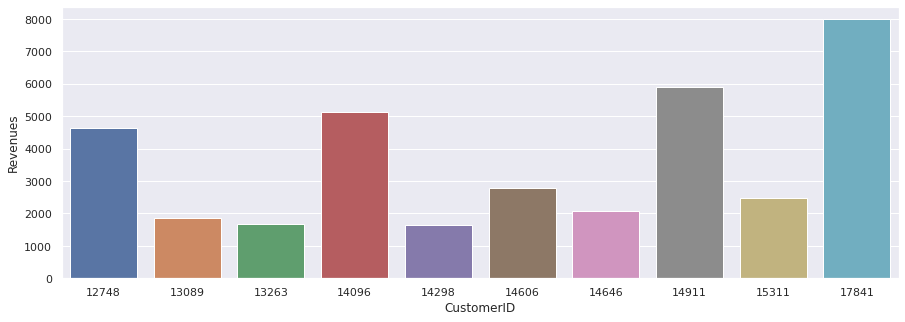

In [74]:
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize= (15,5))
sns.barplot(x='CustomerID', y='Revenues', data= grp_by.head(10), ax=ax)

In [75]:
grp_by.sort_values('Revenues', inplace= True, ascending= False)

In [76]:
grp_by= df1.groupby(['Country']) ['Revenues'].aggregate('count').reset_index().sort_values('Revenues', ascending=False)

In [77]:
g= grp_by.head(5)

In [78]:
g

,Country,Revenues
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


we can see that most of our revenue generated from uk so we can focus on uk based customers. let see how much customers we have in uk.

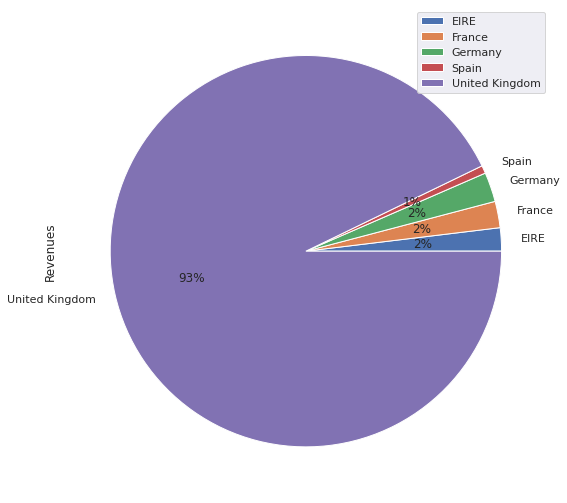

In [79]:
# Plotting the pie chart for above dataframe
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 9))
g.groupby(['Country']).sum().head().plot(kind='pie', y='Revenues', autopct='%1.0f%%', ax=ax)

As we see we get nearly 93%. here we showing top 5 counties ony if we consider all on an average we get 89% of revenue from United Kingdom. So we can use to we can give our more attention towords the united kindoms customers and also build plan to grow in different countries.

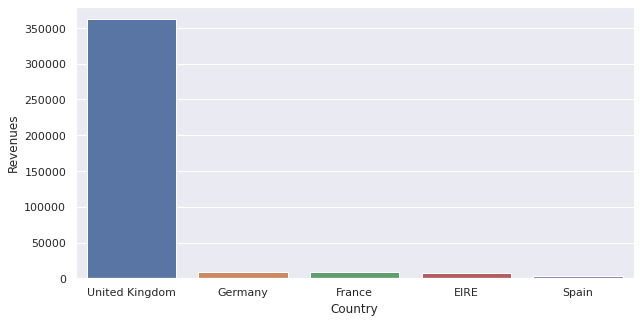

In [80]:
# Plotting the bar plot for above dataframe
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize= (10,5))
sns.barplot(x='Country', y='Revenues', data= g.head(5), ax=ax)

In [81]:
#changing into datetimeforat
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [82]:
#removing hrs:second from date
df1['InvoiceDate'] = df1['InvoiceDate'].dt.strftime('%d/%m/%Y')

In [83]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010,2.55,17850,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,01/12/2010,3.39,17850,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010,2.75,17850,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010,3.39,17850,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010,3.39,17850,United Kingdom,20.34


In [84]:
df1['Year'] = pd.DatetimeIndex(df1['InvoiceDate']).year
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues,Year
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010,2.55,17850,United Kingdom,15.30,2010
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010,2.75,17850,United Kingdom,22.00,2010
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010


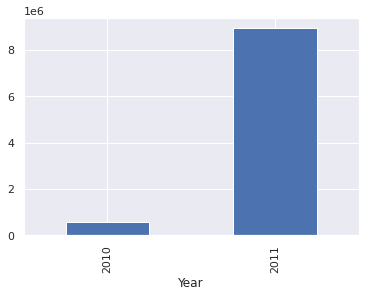

In [85]:
#Total sales for different years
df1.groupby('Year')['Revenues'].sum().plot(kind = 'bar')

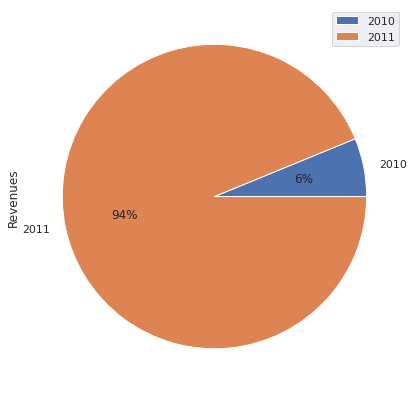

In [86]:
#Total sales for different years
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 7))
df1.groupby(['Year']).sum().head().plot(kind = 'pie', y='Revenues', autopct='%1.0f%%', ax=ax)

In [87]:
df2 = df1

In [88]:
#counting the orders on every month
df1.groupby(['InvoiceDate'])['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,31/10/2011,1838
303,31/08/2011,870
302,31/07/2011,1262
301,31/05/2011,923
300,31/03/2011,1114
...,...,...
4,01/06/2011,739
3,01/05/2011,452
2,01/04/2011,1141
1,01/03/2011,1103


In [89]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues,Year
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010,2.55,17850,United Kingdom,15.30,2010
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010,2.75,17850,United Kingdom,22.00,2010
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010,3.39,17850,United Kingdom,20.34,2010


In [90]:
#counting the orders on every every month
df1 = df.groupby([df.InvoiceDate.dt.month],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

In [91]:
#changing the name of columns
df1.rename(columns = {'InvoiceDate':'Month' , "InvoiceNo" : "Number_Of_Orders"}, inplace = True)
df1.head()

,Month,Number_Of_Orders
11,12,68006
10,11,84711
9,10,60742
8,9,50226
7,8,35284


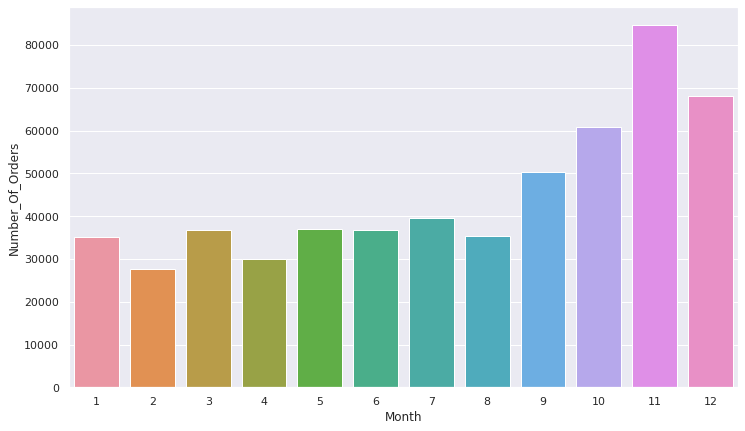

In [92]:
#ploting the bar plot monts vs Number_of_Orders
plt.figure(figsize=(12,7))
sns.barplot(x = 'Month', y = "Number_Of_Orders" , data = df1)

# **What is RFM analysis?**

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

# Recency: How recently has the customer made a transaction with us

# Frequency: How frequent is the customer in ordering/buying some product from us

# Monetary: How much does the customer spend on purchasing products from us.

In [93]:
df1

,Month,Number_Of_Orders
11,12,68006
10,11,84711
9,10,60742
8,9,50226
7,8,35284
6,7,39518
5,6,36874
4,5,37030
3,4,29916
2,3,36748


In [94]:
#Find the last order date in our data:
df2.InvoiceDate.max()
#So for recency we will take 2011–12–10 as our reference date.
import datetime as dt
NOW = dt.datetime(2011,12,10)

‘Now’ is a date type object; so for data processing, we will convert the InvoiceDate column into pandas date object. Next we groupby CustomerID and aggregate using lambda functions.

In [95]:
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'])
rfm=df2.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW-x.max()).days,'InvoiceNo':lambda x:len(x),'Revenues':lambda x: x.sum()})
rfm.head()

,InvoiceDate,InvoiceNo,Revenues
CustomerID,,,
12346,326,2,154367.20
12347,40,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [96]:
rfm.describe()

,InvoiceDate,InvoiceNo,Revenues
count,4372.000000,4372.000000,4372.000000
mean,100.987420,93.053294,2178.439706
std,113.931649,232.471608,10502.731687
min,0.000000,1.000000,1.250000
25%,20.000000,17.000000,308.850000
50%,57.000000,42.000000,678.410000
75%,152.000000,102.000000,1696.285000
max,697.000000,7983.000000,336942.100000


In [97]:
#lets put these customers into bins. We will categorize each customers into quartiles — [0.25,0.5,0,75]. So 0.25 is 25th percentile, 0.5 is 50th percentile and so on.
quant = rfm.quantile(q=[0.25,0.5,0.75])
quant = quant.to_dict()
quant

{'InvoiceDate': {0.25: 20.0, 0.5: 57.0, 0.75: 152.0},
 'InvoiceNo': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Revenues': {0.25: 308.85, 0.5: 678.4100000000001, 0.75: 1696.2849999999999}}

What this means is- lets take frequency: for 0.25 quantile we have 17. So this says that 25% of values are less than 17, 50% values are less than 41 and so on.

# **RFM Analysis Analysis Using Python**

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

Recency: How recently has the customer made a transaction with us Frequency: How frequent is the customer in ordering/buying some product from us Monetary: How much does the customer spend on purchasing products from us

In [98]:
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['F_rank'] = df['InvoiceDate'].rank(ascending=True)
df['M_rank'] = df['InvoiceDate'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R_rank,F_rank,M_rank,R_rank_norm
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,23573.5,4.0,4.0,5.794456
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,23573.5,4.0,4.0,5.794456
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,23573.5,4.0,4.0,5.794456
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,23573.5,4.0,4.0,5.794456
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,23573.5,4.0,4.0,5.794456


# **Calculating Frequency Value** 

Here we are calculating the frequency value of customer spend on purchasing products from the company.

In [99]:
df_frequency = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# **Calculating Recency value** 

Here we are calculating the recency value of customer spend on purchasing products from the company.

In [100]:
df_recency = df.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


# **Calculating Monetary value** 

Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [101]:
df['Total'] = df['CustomerID']*df['Quantity']
df_monetary = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,1.832517e+09
1,12347.0,3.034893e+07
2,12348.0,2.890667e+07
3,12349.0,7.792219e+06
4,12350.0,2.432950e+06


# **Merging all three columns in one dataframe**

Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.


Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.


In [104]:
df_rfm = df_recency.merge(df_frequency, on='CustomerID')

df_rfm = df_recency.merge(df_recency)


df_rfm = df_rfm.merge(df_monetary, on='CustomerID').drop(
    columns='InvoiceDate')
df_rfm.head()

,CustomerID,Recency,Monetary
0,12346.0,325,1.832517e+09
1,12347.0,1,3.034893e+07
2,12348.0,74,2.890667e+07
3,12349.0,18,7.792219e+06
4,12350.0,309,2.432950e+06


In [105]:
df_rf = df_recency.merge(df_frequency, on='CustomerID')
df_rfm = df_rf.merge(df_monetary, on='CustomerID').drop(
    columns='InvoiceDate')
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,1.832517e+09
1,12347.0,1,182,3.034893e+07
2,12348.0,74,31,2.890667e+07
3,12349.0,18,73,7.792219e+06
4,12350.0,309,17,2.432950e+06


# **Ranking Customer’s based upon their recency, frequency, and monetary score**

In [106]:
df_rfm['R_rank'] = df_rfm['Recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['Frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100
 
df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,1.832517e+09,3.865741,2.493138,2.493138
1,12347.0,1,182,3.034893e+07,97.719907,88.129003,88.129003
2,12348.0,74,31,2.890667e+07,38.182870,42.074565,42.074565
3,12349.0,18,73,7.792219e+06,72.974537,66.720037,66.720037
4,12350.0,309,17,2.432950e+06,5.578704,24.794145,24.794145


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

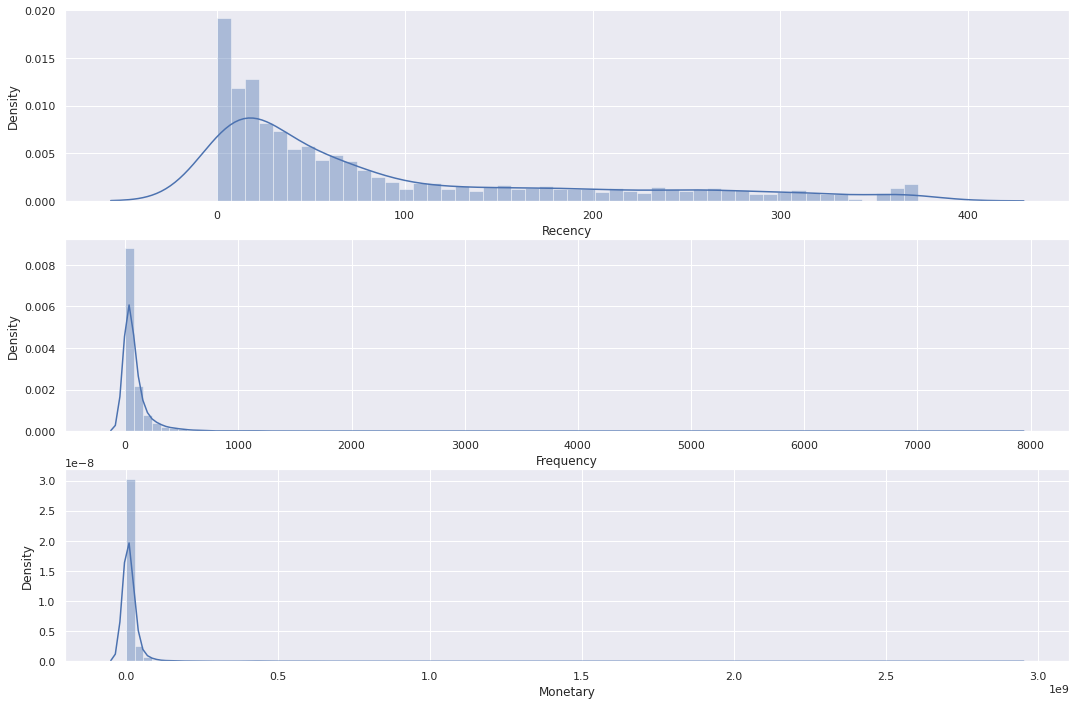

In [107]:
plt.figure(figsize=(18,12))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'],bins=50)

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequency'],bins=100)

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetary'],bins=100)

# Show the plot
plt.show()

# **Calculating RFM score** 

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15Recency score + 0.28Frequency score + 0.57 *Monetary score

In [108]:
df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * \
    df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.13
1,12347.0,4.48
2,12348.0,2.07
3,12349.0,3.38
4,12350.0,1.10
5,12352.0,3.56
6,12353.0,0.34


# **Rating Customer based upon the RFM score**
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [109]:
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        df_rfm['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    df_rfm['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(df_rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df_rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.13,Lost Customers
1,12347.0,4.48,High value Customer
2,12348.0,2.07,Low Value Customers
3,12349.0,3.38,Medium Value Customer
4,12350.0,1.10,Lost Customers
5,12352.0,3.56,Medium Value Customer
6,12353.0,0.34,Lost Customers
7,12354.0,2.66,Low Value Customers
8,12355.0,0.93,Lost Customers
9,12356.0,3.09,Medium Value Customer


# **Visualizing the customer segments** 

Here we will use a pie plot to display all segments of customers.

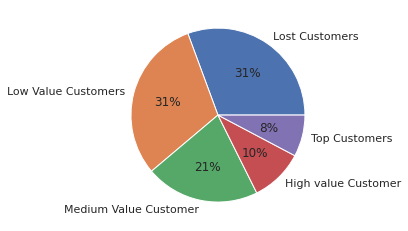

In [110]:
plt.pie(df_rfm.Customer_segment.value_counts(),
        labels=df_rfm.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# **Customer Lifetime Value** 

**What keeps a customer coming back?**

Customers are gained and lost over the lifetime of any company, but a truly great product or service can keep customers well fed, yet still hungry for more—figuratively speaking. This appetite for more is what continuously adds value to the company over the span of their relationship with customers.

# **What is Customer Lifetime Value?** 

Customer lifetime value (CLV), sometimes referred to as lifetime value (LTV), is the profit margin a company expects to earn over the entirety of their business relationship with the average customer.

The customer lifetime value must account for customer acquisition costs (CAC), ongoing sales and marketing expenses, operating expenses, and, of course, the cost required to manufacture the product and services the company is selling.

Many companies take a short-sighted approach by overlooking this valuable metric and instead optimize for a single sale in the near term. It’s still important to find new customers for the growth of the company, but optimizing the lifetime value of existing customers is also essential for a company to sustain a viable business model.

In fact, an increase in customer retention rates by only 5% has been found to increase profits anywhere from 25% to 95%.1 With this in mind, increasing the expected customer lifetime value is essential.

# **Customer Lifetime Value Calculation**

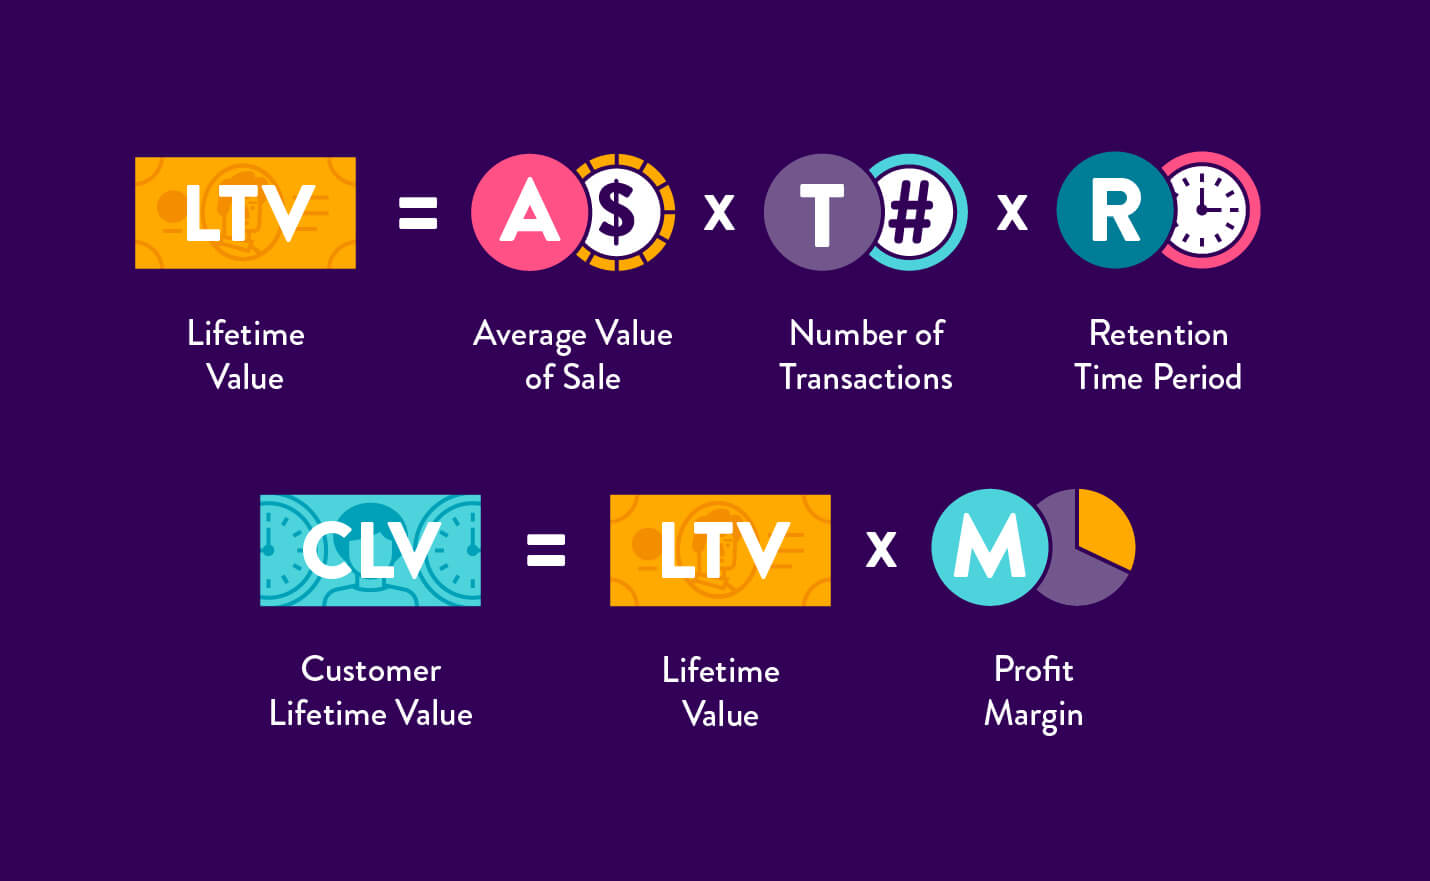

In [111]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 7.9 MB/s 


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


from sklearn.metrics import mean_absolute_percentage_error
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import \
    calibration_and_holdout_data, \
    summary_data_from_transaction_data, \
    calculate_alive_path
from lifetimes.plotting import \
    plot_frequency_recency_matrix, \
    plot_probability_alive_matrix, \
    plot_period_transactions, \
    plot_history_alive, \
    plot_cumulative_transactions, \
    plot_calibration_purchases_vs_holdout_purchases, \
    plot_transaction_rate_heterogeneity, \
    plot_dropout_rate_heterogeneity


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.0f}'.format

# **Introduction to Cohort Analysis**
Let’s start with the basics. A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

When carrying out the cohort analysis, it is crucial to consider the relationship between the metric we are tracking and the business model. Depending on the company’s goals, we can focus on user retention, conversion ratio (signing up to the paid version of the service), generated revenue, etc.

In this article, I cover the case of user retention. By understanding user retention, we can infer the stickiness/loyalty of the customers and evaluate the health of the business. It is important to remember that the expected retention values vary greatly between businesses, 3 purchases a year for one retailer might be a lot, while for another might be far too little.

Retaining customers is critical for any business, as it is far cheaper to keep the current customers (by using CRM tools, member discounts, etc.) than to acquire new ones.

Furthermore, cohort analysis can also help to observe the impact of changes to the product on the user behavior, be it design changes or entirely new features. By seeing how the groups behave over time, we can more or less observe if our efforts had some effects on the users.

This should be enough of theory for now, let’s move to the real-life example.

In [113]:
#using previous dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R_rank,F_rank,M_rank,R_rank_norm,Total
0,"536,365",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,"23,574",4,4,6,"107,100"
1,"536,365","71,053",WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,"23,574",4,4,6,"107,100"
2,"536,365",84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,"17,850",United Kingdom,"23,574",4,4,6,"142,800"
3,"536,365",84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,"23,574",4,4,6,"107,100"
4,"536,365",84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,"17,850",United Kingdom,"23,574",4,4,6,"107,100"


We also inspected the DataFrame using df.info() to see if there are missing values. As for the analysis, due to the fact that we need to have the customer IDs, we dropped all the rows without them.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   R_rank       406829 non-null  float64       
 9   F_rank       541909 non-null  float64       
 10  M_rank       541909 non-null  float64       
 11  R_rank_norm  406829 non-null  float64       
 12  Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 53.7+ MB


In [115]:
#In the customer IDs, we dropped all the rows which is represent as null.
df.dropna(subset=['CustomerID'], inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  float64       
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   R_rank       406829 non-null  float64       
 9   F_rank       406829 non-null  float64       
 10  M_rank       406829 non-null  float64       
 11  R_rank_norm  406829 non-null  float64       
 12  Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 43.5+ MB


For completeness’ sake, we also do a very quick EDA, with a focus on the users. EDA is always a very important step of any analysis, as we discover the specifics of the dataset we are working with.

We start by inspecting the distribution of the numeric variables — quantity and unit price.

In [117]:
#We start by inspecting the distribution of the numeric variables — quantity, unit price and customerId.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,"406,829",13,249,1,2,5,12,"80,995"
UnitPrice,"406,829",3,69,0,1,2,4,"38,970"
CustomerID,"406,829","15,288","1,714","12,346","13,953","15,152","16,791","18,287"
R_rank,"406,829","203,415","117,441",36,"101,732","203,356","305,128","406,828"
F_rank,"406,829","278,049","152,744",4,"147,765","284,454","409,534","541,902"
M_rank,"406,829","278,049","152,744",4,"147,765","284,454","409,534","541,902"
R_rank_norm,"406,829",50,29,0,25,50,75,100
Total,"406,829","202,869","3,664,427","12,348","30,008","76,032","176,130","1,332,043,770"


From the table above, we can see that there are orders with negative quantity — most likely returns. In total, there are around 9 thousand purchases with a negative quantity. We remove them from the dataset. This introduces a kind of bias, as we include the initial orders and remove the return — this way the initial order is taken into account even though in theory it was not realized and did not generate revenue. However, for simplicity, we leave the initial order, as for metric such as retention (indicating the customers’ engagement) this should still be a valid assumption.

Then, we calculate an aggregate metric indicating how many orders were placed by each customer.

In [118]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


Using the code above, we can state that 69.97% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention. Given that the dataset has no sign-up/joined date, it would be problematic if the majority of the users only placed one order, but we will get back to it later.

Additionally, we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

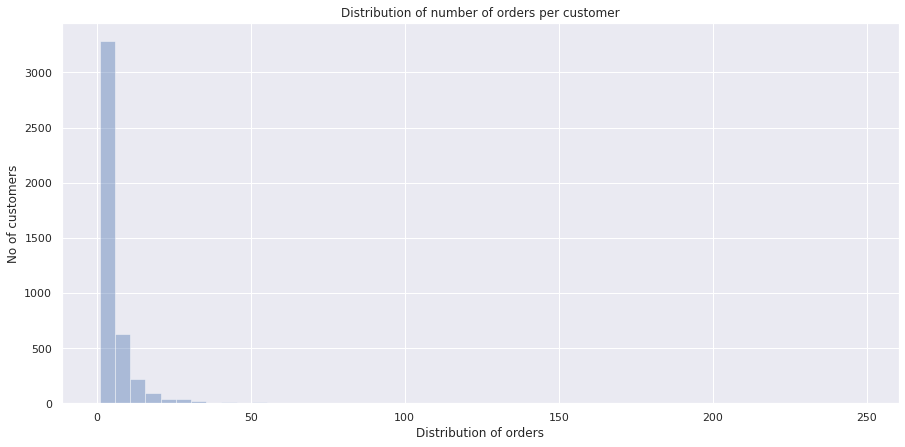

In [119]:
plt.figure(figsize=(15, 7))
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='Distribution of orders', 
       ylabel='No of customers');

There are some infrequent cases of customers, who ordered more than 50 times.

# **Cohort Analysis** 

The dataset we are using for this example does not contain the customer sign-up date — the date when they registered with the retailer. That is why we assume that the cohort they belong to is based on the first purchase date. A possible downside of this approach is that the dataset does not contain the past data, and what we already see in this snapshot (between 01/12/2010 and 09/12/2011) includes recurring clients. In other words, the first purchase we see in this dataset might not be the actual first purchase of a given client. However, there is no way to account for this without having access to the entire historical dataset of the retailer.

As the first step, we keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode).

In [120]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

As the second step, we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [121]:
df

,CustomerID,InvoiceNo,InvoiceDate
0,"17,850","536,365",2010-12-01 08:26:00
7,"17,850","536,366",2010-12-01 08:28:00
9,"13,047","536,367",2010-12-01 08:34:00
21,"13,047","536,368",2010-12-01 08:34:00
25,"13,047","536,369",2010-12-01 08:35:00
...,...,...,...
541865,"13,777","581,583",2011-12-09 12:23:00
541867,"13,777","581,584",2011-12-09 12:25:00
541869,"15,804","581,585",2011-12-09 12:31:00
541890,"13,113","581,586",2011-12-09 12:49:00


As the second step, we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [122]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [123]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,"17,850","536,365",2010-12-01 08:26:00,2010-12,2010-12
7,"17,850","536,366",2010-12-01 08:28:00,2010-12,2010-12
9,"13,047","536,367",2010-12-01 08:34:00,2010-12,2010-12
21,"13,047","536,368",2010-12-01 08:34:00,2010-12,2010-12
25,"13,047","536,369",2010-12-01 08:35:00,2010-12,2010-12


Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchase.

In [124]:
from operator import attrgetter
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [125]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.



In [126]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.




In [127]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [128]:
cohort_size

cohort
2010-12   948
2011-01   421
2011-02   380
2011-03   440
2011-04   299
2011-05   279
2011-06   235
2011-07   191
2011-08   167
2011-09   298
2011-10   352
2011-11   321
2011-12    41
Freq: M, Name: 0, dtype: float64

Lastly, we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap — no coloring at all.

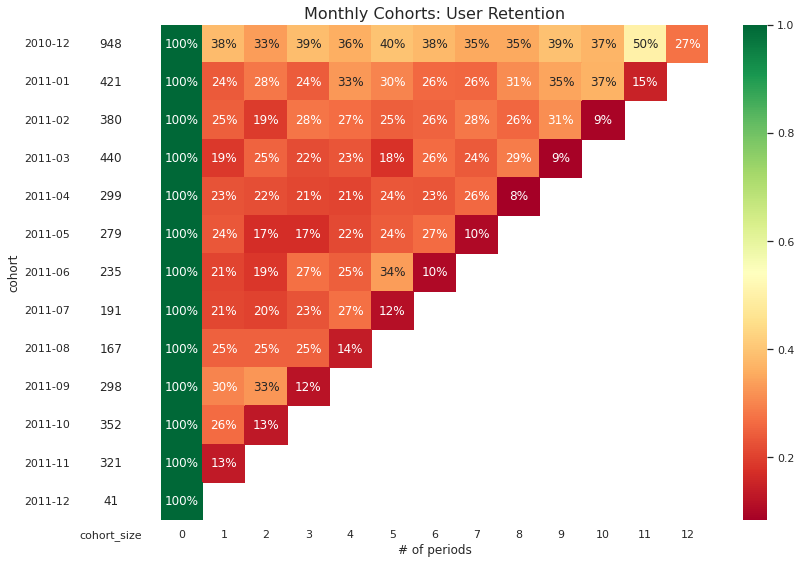

In [129]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 80% of customers do not make any purchase in the second month. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention. This might be a cohort of dedicated customers, who first joined the platform based on some already-existing connections with the retailer. However, from data alone, that is very hard to accurately explain.

Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.

# **Conclusions**
In this article, I showed how to carry out Cohort Analysis using Python’s pandas and seaborn. On the way, I have made some simplifying assumptions, but that was mostly due to the nature of the dataset. While working on a real-life scenario for a company, we would have more understanding of the business and could draw better and more meaningful conclusions from the analysis.